In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Wine.csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# checking null values

In [4]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Alcohol                     AxesSubplot(0.125,0.71587;0.168478x0.16413)
Malic_Acid               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Ash                      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Ash_Alcanity             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Magnesium                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total_Phenols           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Flavanoids              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Nonflavanoid_Phenols    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Proanthocyanins            AxesSubplot(0.125,0.321957;0.168478x0.16413)
Color_Intensity         AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Hue                     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
OD280                   AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Proline                       AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

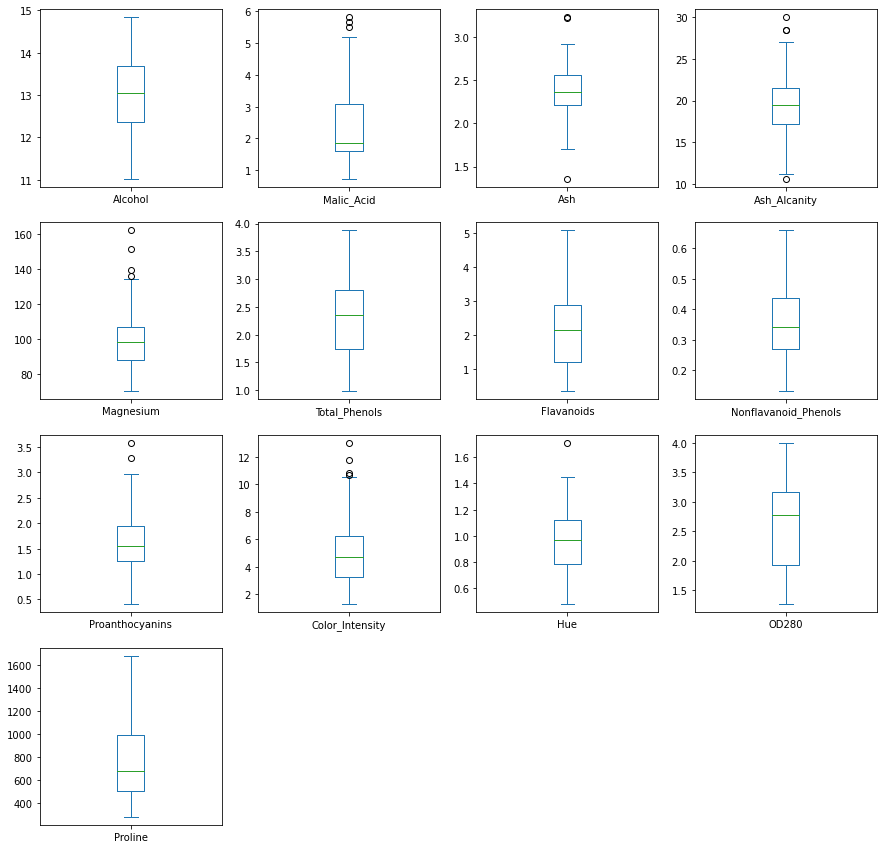

In [5]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))

# checking  and handling outliers

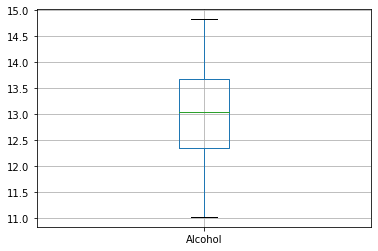

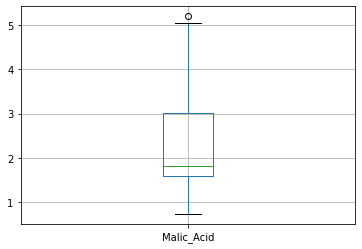

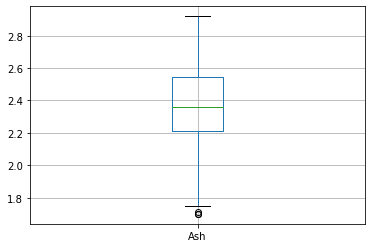

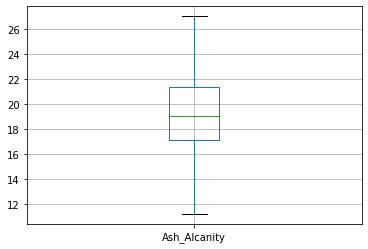

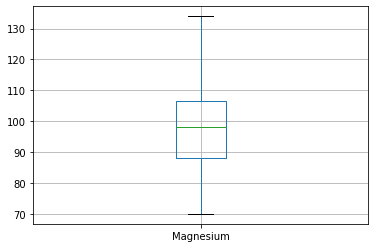

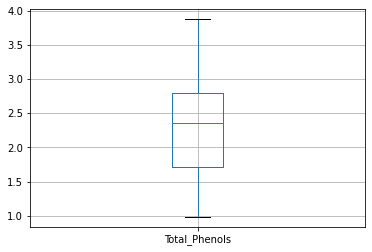

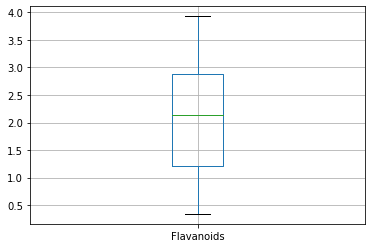

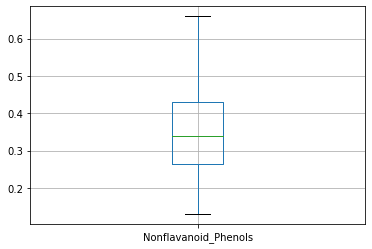

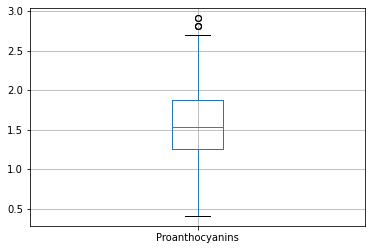

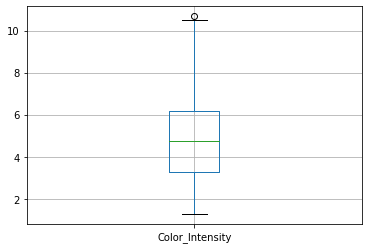

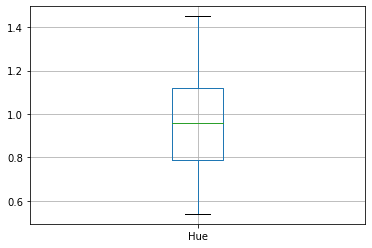

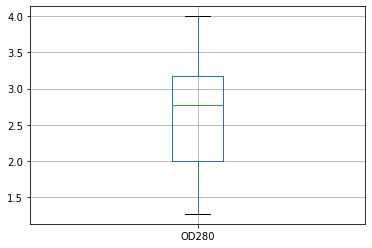

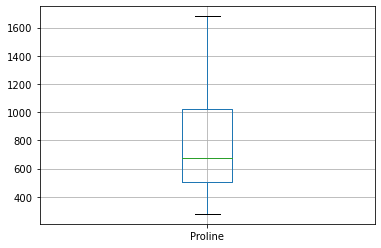

In [6]:
for x in df.columns:
 Q1=np.percentile(df[x],25, interpolation ='midpoint')
 Q2=np.percentile(df[x],50, interpolation ='midpoint')
 Q3=np.percentile(df[x],75, interpolation ='midpoint')
 IQR =Q3-Q1
 low_limit = Q1-1.5*IQR
 upper_limit =Q3+1.5*IQR
 ind_1 =df[x]>upper_limit
 df.drop(df.loc[ind_1].index,inplace =True)
 ind_2 =df[x]<low_limit
 df.drop(df.loc[ind_2].index,inplace =True)
 df[[x]].boxplot()
 plt.show()

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.034596,2.318199,2.364658,19.300621,98.590062,2.280435,2.026894,0.359006,1.538758,5.033913,0.956932,2.619876,753.819876
std,0.791422,1.053406,0.241922,2.974149,12.401347,0.628964,0.981421,0.121821,0.513838,2.155207,0.217376,0.713409,317.816297
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.610000,2.230000,17.200000,88.000000,1.700000,1.200000,0.270000,1.240000,3.270000,0.790000,2.000000,502.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.320000,2.130000,0.340000,1.480000,4.800000,0.960000,2.780000,675.000000
75%,13.690000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.120000,3.180000,1020.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.680000,1.450000,4.000000,1680.000000


# Normalizing the data

In [8]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df1=scalar.fit_transform(df)
df1=pd.DataFrame(df1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174
1,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830
2,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929
3,1.692612,-0.350622,0.561189,-0.843409,1.165591,2.503264,1.495455,-0.979945,1.251840,1.287448,-0.447308,1.167233,2.292034
4,0.260347,0.258826,2.095379,0.573166,1.570031,0.828643,0.677767,0.255215,0.549044,-0.332284,0.383333,0.436064,-0.059401


In [9]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02
mean,3.082420e-15,-1.130910e-16,8.936951e-16,-7.033711e-17,-2.770386e-16,1.999781e-17,-5.047722e-16,-3.020358e-16,-4.585704e-17,2.358362e-16,9.336907e-16,-8.137038e-17,-2.965192e-17
std,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00
min,-2.059161e+00,-1.502862e+00,-2.755979e+00,-2.732175e+00,-2.312593e+00,-2.074034e+00,-1.724192e+00,-1.885730e+00,-2.203572e+00,-1.747222e+00,-1.924002e+00,-1.898052e+00,-1.501825e+00
25%,-8.423697e-01,-6.743920e-01,-5.583556e-01,-7.084969e-01,-8.566089e-01,-9.257223e-01,-8.451773e-01,-7.329132e-01,-5.832379e-01,-8.209962e-01,-7.703344e-01,-8.716036e-01,-7.948163e-01
50%,4.487390e-02,-4.363261e-01,-1.931581e-02,-1.013934e-01,-4.772894e-02,6.310167e-02,1.053853e-01,-1.565048e-01,-1.147075e-01,-1.088726e-01,1.415929e-02,2.251497e-01,-2.487783e-01
75%,8.307182e-01,7.444810e-01,7.270469e-01,5.731660e-01,5.993751e-01,8.286428e-01,8.924102e-01,5.845916e-01,6.466544e-01,5.427439e-01,7.525063e-01,7.875873e-01,8.401414e-01
max,2.275658e+00,2.734712e+00,2.302702e+00,2.596844e+00,2.864239e+00,2.551110e+00,1.945184e+00,2.478505e+00,2.676953e+00,2.627916e+00,2.275347e+00,1.940584e+00,2.923292e+00


# K means clustering

C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2093.0


C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1453.2302460891567


C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1080.418730392001


C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


996.5887935875476


C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


935.3954327556506


C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


883.0645994879956


C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


839.4649448024404


C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


797.7459081496827


C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


769.7408010681218


C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


742.845839004708


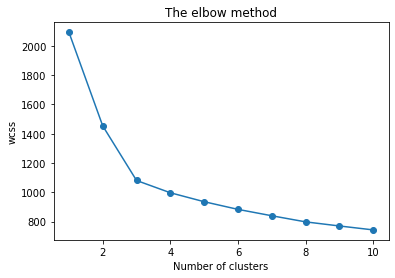

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss,'-o')
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

The optimum number of clusters is 3

In [11]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df)
y_kmeans

C:\Users\robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 0])

In [12]:
df1['Category']=y_kmeans

In [13]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,Category
0,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174,1
1,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830,1
2,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929,1
3,1.692612,-0.350622,0.561189,-0.843409,1.165591,2.503264,1.495455,-0.979945,1.251840,1.287448,-0.447308,1.167233,2.292034,1
4,0.260347,0.258826,2.095379,0.573166,1.570031,0.828643,0.677767,0.255215,0.549044,-0.332284,0.383333,0.436064,-0.059401,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.426439,0.182645,0.478259,0.235886,-0.613945,-0.957620,-1.356232,0.666936,-0.583238,2.171785,-1.554828,-1.279371,-0.296123,2
157,0.463146,1.515815,0.478259,1.247725,0.275823,-0.766235,-1.305127,0.584592,-0.251362,1.054728,-1.185655,-1.490285,-0.012057,2
158,0.298372,1.868152,-0.433962,0.235886,1.731807,-1.101159,-1.366453,0.584592,-0.368495,2.404505,-1.693268,-1.490285,0.256228,2
159,0.171623,0.258826,0.022149,0.235886,1.731807,-1.005466,-1.376675,1.408032,-0.153752,1.985609,-1.647122,-1.405919,0.272009,2


# checking goodness of fit

In [14]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df1, y_kmeans)

score

0.16391782614867562

In [15]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df2=scalar.fit_transform(df)
df2=pd.DataFrame(df2)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174
1,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830
2,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929
3,1.692612,-0.350622,0.561189,-0.843409,1.165591,2.503264,1.495455,-0.979945,1.251840,1.287448,-0.447308,1.167233,2.292034
4,0.260347,0.258826,2.095379,0.573166,1.570031,0.828643,0.677767,0.255215,0.549044,-0.332284,0.383333,0.436064,-0.059401


# Agglomerative heirarchical clustering

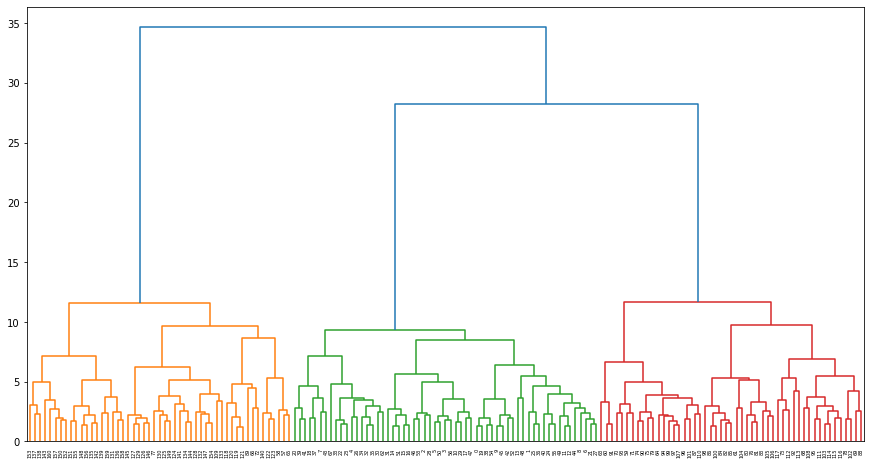

In [16]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df2,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters = 3,affinity= 'euclidean',linkage='ward')
labels= hc.fit_predict(df2)

In [18]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

# checking goodness of fit

In [19]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df2, labels)

In [20]:
score

0.29574004115878627